        Kate Gallagher
        MSDS 696: Practicum II
        Spring 2024|8w2

## Import, Format & Analyze Performance Testing Results

The purpose of this script is to import, format, and analyze results from 92 different performance tests on various data source/trader style/strategy configurations.

In Section 1 I import the test results from CSV and format them.

In Section 2 I create tables of the results using the Pandas library, and use Seaborn and MatPlotLib libraries to create graphs to visually display the results.

### Section 1: Import and Format Results

In [4]:
#import packages
import pandas as pd
import os
import csv

In [5]:
#load csv
df = pd.read_csv('outcomes.csv')

In [6]:
#examine data
df.head()

,source,strategy,trader_style,performance,Unnamed: 4,Unnamed: 5
0,binance,buy&hold,cutting edge,632.0%,NaN,NaN
1,binance,buy&hold,diversified,320.6%,NaN,NaN
2,binance,buy&hold,meme,63.4%,NaN,NaN
3,binance,buy&hold,simple - ada,165.2%,NaN,NaN
4,binance,buy&hold,simple - btc,266.9%,NaN,NaN


In [7]:
#drop empty columns
df.drop(df.columns[df.columns.str.contains('Unnamed', na=True)], axis=1, inplace=True)

In [9]:
#examine data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source        92 non-null     object
 1   strategy      92 non-null     object
 2   trader_style  92 non-null     object
 3   performance   92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [10]:
#convert performance column to float
df['performance'] = pd.to_numeric(df['performance'].str.replace('%', ''), errors='coerce')

In [11]:
#examine data
df.head()

,source,strategy,trader_style,performance
0,binance,buy&hold,cutting edge,632.0
1,binance,buy&hold,diversified,320.6
2,binance,buy&hold,meme,63.4
3,binance,buy&hold,simple - ada,165.2
4,binance,buy&hold,simple - btc,266.9


In [12]:
#examine data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   source        92 non-null     object 
 1   strategy      92 non-null     object 
 2   trader_style  92 non-null     object 
 3   performance   92 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.0+ KB


### Section 2: EDA & Analysis

In [13]:
#import packages
import seaborn as sns
import matplotlib.pyplot as plt

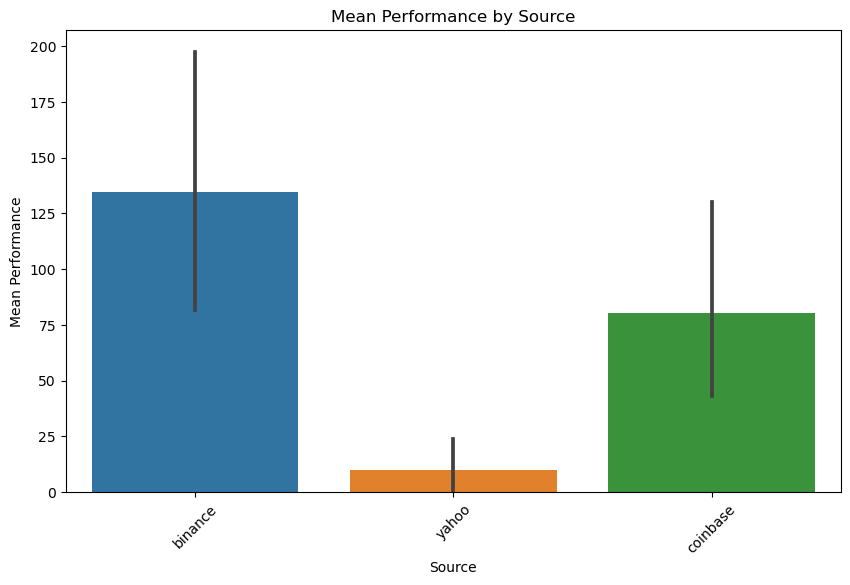

In [14]:
#create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='source', y='performance', data=df)
plt.title('Mean Performance by Source')
plt.xlabel('Source')
plt.ylabel('Mean Performance')
plt.xticks(rotation=45)
plt.show()

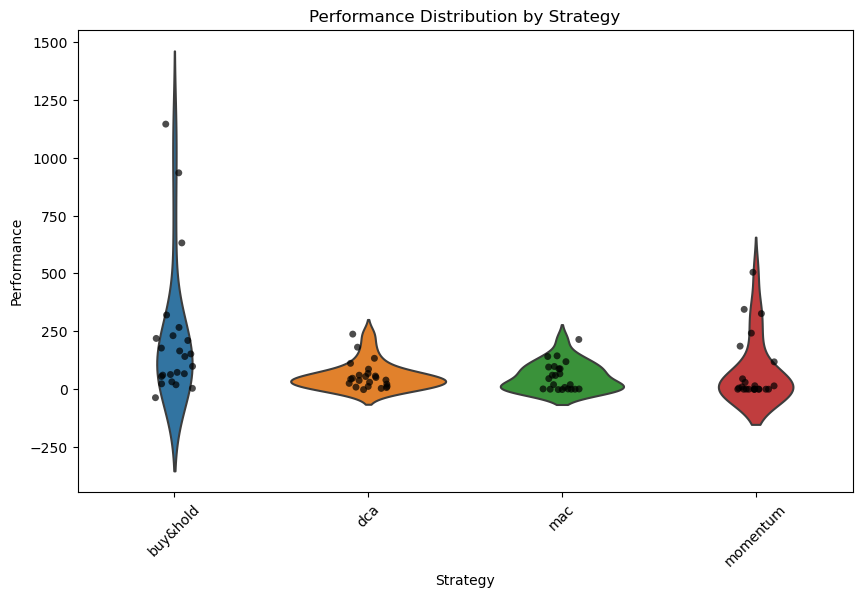

In [22]:
#create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='strategy', y='performance', data=df, inner=None)  
sns.stripplot(x='strategy', y='performance', data=df, color='k', alpha=0.7)  
plt.title('Performance Distribution by Strategy')
plt.xlabel('Strategy')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.show()


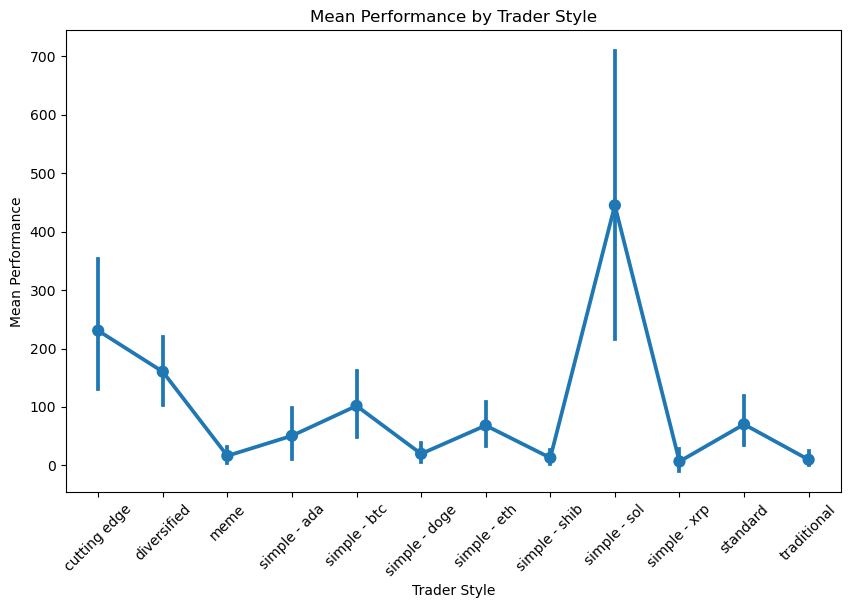

In [29]:
#create point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='trader_style', y='performance', data=df)
plt.title('Mean Performance by Trader Style')
plt.xlabel('Trader Style')
plt.ylabel('Mean Performance')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [31]:
#calculate the mean performance for each trader style
mean_performance = df.groupby('trader_style')['performance'].mean().reset_index()

#sort the DataFrame by mean performance (highest to lowest)
mean_performance_sorted = mean_performance.sort_values(by='performance', ascending=False)

#display the mean performance for each trader style
display(mean_performance_sorted)

,trader_style,performance
8,simple - sol,445.1000
0,cutting edge,230.6000
1,diversified,160.2750
4,simple - btc,101.8375
10,standard,70.2250
6,simple - eth,68.2625
3,simple - ada,50.6500
5,simple - doge,19.7000
2,meme,16.2625
7,simple - shib,12.8625


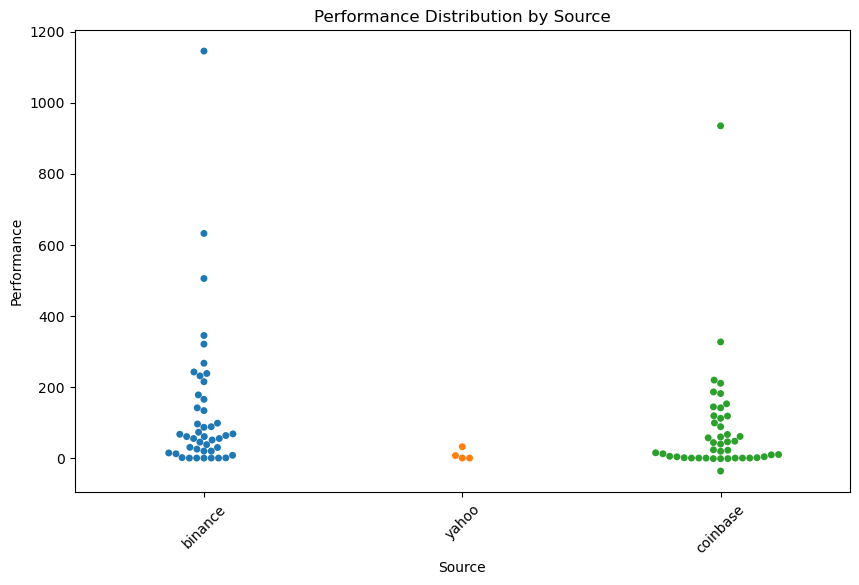

In [17]:
#create swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='source', y='performance', data=df)
plt.title('Performance Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.show()

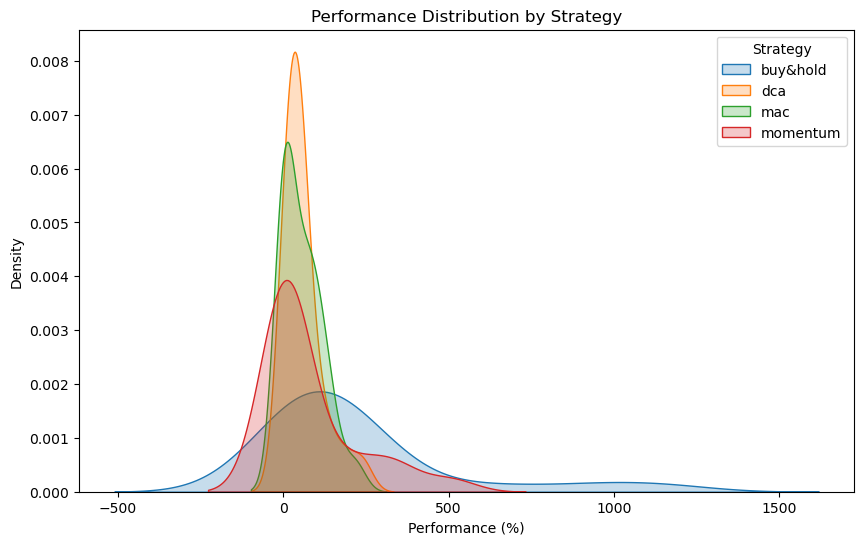

In [35]:
#create overlaid KDE plot
plt.figure(figsize=(10, 6))
for strategy_category in df['strategy'].unique():
    sns.kdeplot(data=df[df['strategy'] == strategy_category]['performance'], shade=True, label=strategy_category)

plt.title('Performance Distribution by Strategy')
plt.xlabel('Performance (%)')
plt.ylabel('Density')
plt.legend(title='Strategy')
plt.show()

#adapted from ChatGPT

In [34]:
#calculate the mean performance for each trader style
strategy_mean_performance = df.groupby('strategy')['performance'].mean().reset_index()

#sort the DataFrame by mean performance (highest to lowest)
strategy_mean_performance_sorted = strategy_mean_performance.sort_values(by='performance', ascending=False)

#display the mean performance for each trader style
display(strategy_mean_performance_sorted)

,strategy,performance
0,buy&hold,219.839130
3,momentum,80.104348
1,dca,57.826087
2,mac,55.178261
